In [1]:
import time
import tensorflow as tf
from keras import Sequential
import keras.utils.np_utils as kutils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [19]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(64, 64),
        batch_size=20000,
        class_mode='binary')


test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(64, 64),
        batch_size=2500,
        class_mode='binary')

print("Classes of data: ", train_generator.class_indices)
data_train = train_generator.next()
data_test = test_generator.next()

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Classes of data:  {'cats': 0, 'dogs': 1}


In [21]:
(x_train, y_train) = data_train
(x_test, y_test) = data_test

In [4]:
# model = Sequential()
# layers = tf.keras.applications.ResNet50(include_top = False, weights = 'imagenet', input_shape = (32,32,3), classes = 2)
# model.add(layers)
# model.add(Flatten())
# model.add(Dense(1,activation='sigmoid'))

In [5]:

# baseModel= tf.keras.applications.ResNet50(include_top = False, weights = 'imagenet', input_shape = (32,32,3), classes = 2)

# out=baseModel.layers[-1].output
# out = Flatten()(out)
# output = Dense(1, activation='sigmoid')(out)

# model = tf.keras.models.Model(inputs=baseModel.input, outputs=output)
# model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

In [6]:
# opt = SGD(lr=0.001, momentum=0.9)
# model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
model = Sequential()
model.add(Conv2D(64,3,3,input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,2,2,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 21, 21, 64)        1792      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 5, 5, 32)          8224      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 2, 2, 32)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 64)              

In [45]:
start_time = time.time()

history = model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=1, validation_split=0.1)

print("--- %s seconds ---" % (time.time() - start_time))

loss = history.history['loss']

Epoch 1/100
180/180 [==============================] - 2s 11ms/step - loss: 0.6828 - accuracy: 0.5539 - val_loss: 0.6661 - val_accuracy: 0.5795
Epoch 2/100
180/180 [==============================] - 2s 11ms/step - loss: 0.6498 - accuracy: 0.6224 - val_loss: 0.6356 - val_accuracy: 0.6285
Epoch 3/100
180/180 [==============================] - 2s 11ms/step - loss: 0.6255 - accuracy: 0.6525 - val_loss: 0.6130 - val_accuracy: 0.6665
Epoch 4/100
180/180 [==============================] - 2s 11ms/step - loss: 0.6053 - accuracy: 0.6731 - val_loss: 0.5926 - val_accuracy: 0.6920
Epoch 5/100
180/180 [==============================] - 2s 11ms/step - loss: 0.5930 - accuracy: 0.6835 - val_loss: 0.5899 - val_accuracy: 0.6900
Epoch 6/100
180/180 [==============================] - 2s 11ms/step - loss: 0.5812 - accuracy: 0.6949 - val_loss: 0.5744 - val_accuracy: 0.7035
Epoch 7/100
180/180 [==============================] - 2s 11ms/step - loss: 0.5650 - accuracy: 0.7078 - val_loss: 0.5999 - val_accuracy:

180/180 [==============================] - 2s 11ms/step - loss: 0.2666 - accuracy: 0.8868 - val_loss: 0.7240 - val_accuracy: 0.7235
Epoch 58/100
180/180 [==============================] - 2s 11ms/step - loss: 0.2558 - accuracy: 0.8943 - val_loss: 0.7729 - val_accuracy: 0.7090
Epoch 59/100
180/180 [==============================] - 2s 11ms/step - loss: 0.2518 - accuracy: 0.8941 - val_loss: 0.7575 - val_accuracy: 0.7175
Epoch 60/100
180/180 [==============================] - 2s 12ms/step - loss: 0.2525 - accuracy: 0.8932 - val_loss: 0.7356 - val_accuracy: 0.7250
Epoch 61/100
180/180 [==============================] - 2s 12ms/step - loss: 0.2460 - accuracy: 0.8977 - val_loss: 0.7635 - val_accuracy: 0.7175
Epoch 62/100
180/180 [==============================] - 2s 12ms/step - loss: 0.2440 - accuracy: 0.8994 - val_loss: 0.7498 - val_accuracy: 0.7175
Epoch 63/100
180/180 [==============================] - 2s 12ms/step - loss: 0.2381 - accuracy: 0.9015 - val_loss: 0.7982 - val_accuracy: 0.724

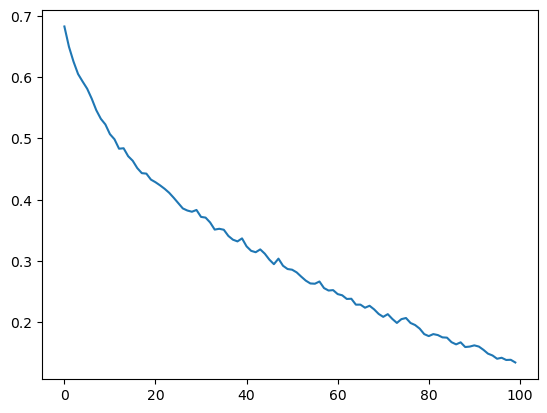

In [48]:
import matplotlib.pyplot as plt
plt.plot(loss)

In [47]:
model.evaluate(x_test, y_test)

79/79 [==============================] - 0s 3ms/step - loss: 1.5326 - accuracy: 0.6932


[1.532578468322754, 0.6931999921798706]